## ARIMA AND SARIMA for flight prediction

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [57]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [58]:
df.dropna(axis=0,inplace=True)

In [59]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [60]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [62]:
df['Month'] = pd.to_datetime(df['Month'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [64]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [65]:
df.set_index('Month',inplace=True)

In [66]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

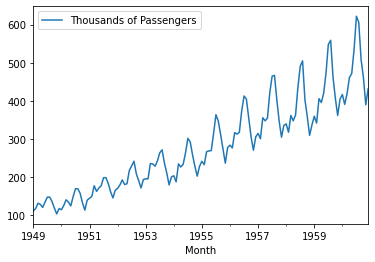

In [67]:
df.plot()

In [68]:
#dickyfuller tets
from statsmodels.tsa.stattools import adfuller

In [69]:
def adf_test(series):
    """
    series : time series data which we need to preform the dicky fuller test
    """
    result = adfuller(series)
    print(f'ADF statics : {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [70]:
adf_test(df['Thousands of Passengers'])

ADF statics : 0.8153688792060423
p-value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [71]:
df['Passengers First Difference'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [72]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [73]:
adf_test(df['Passengers First Difference'].dropna())

ADF statics : -2.8292668241699874
p-value: 0.05421329028382711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [74]:
## Use Techniques Differencing
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [75]:
adf_test(df['Passengers Second Difference'].dropna())

ADF statics : -16.384231542468513
p-value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [76]:
### 12 months 
## Use Techniques Differencing
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [77]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF statics : -3.3830207264924805
p-value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

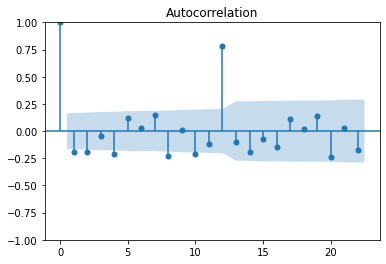

In [79]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

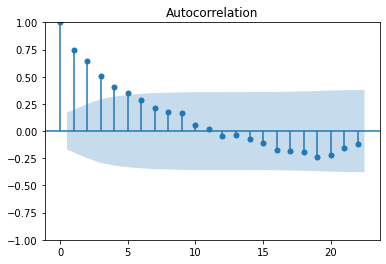

In [80]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())

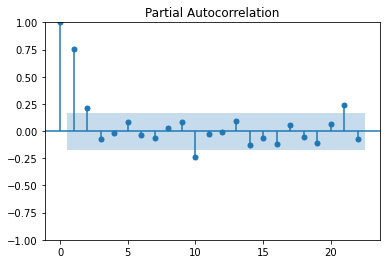

In [81]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

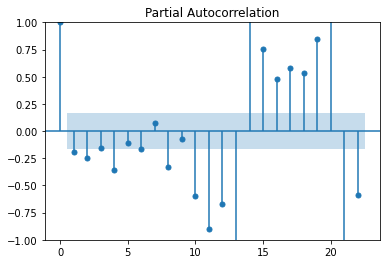

In [82]:
result = plot_pacf(df["Passengers Second Difference"].dropna())

In [83]:
df

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [84]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [85]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [86]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [87]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [88]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [89]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [90]:
#create ARIMA model
from statsmodels.tsa.m import ARIMA

ModuleNotFoundError: No module named 'statsmodels.tsa.m'

In [91]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [92]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [93]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

In [94]:
model_ARIMA_fit = model_ARIMA.fit()

In [95]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Fri, 20 Jan 2023   AIC                            736.477
Time:                             23:31:19   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [98]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)

In [99]:
residuals=test_data['Thousands of Passengers']-pred

In [100]:
pred

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443014
1956-04-01    307.827542
1956-05-01    318.544231
1956-06-01    348.922080
1956-07-01    366.020284
1956-08-01    346.567531
1956-09-01    332.120966
1956-10-01    307.734753
1956-11-01    311.623910
1956-12-01    339.828195
1957-01-01    349.840402
1957-02-01    356.098230
1957-03-01    350.687825
1957-04-01    350.080460
1957-05-01    361.157689
1957-06-01    381.216511
1957-07-01    382.319369
1957-08-01    372.852575
1957-09-01    364.110093
1957-10-01    356.108921
1957-11-01    371.293786
1957-12-01    385.323592
1958-01-01    392.077833
1958-02-01    391.405846
1958-03-01    388.404576
1958-04-01    391.572852
1958-05-01    402.448075
1958-06-01    413.255679
1958-07-01    410.853409
1958-08-01    407.670539
1958-09-01    402.486331
1958-10-01    406.089143
1958-11-01    418.125308
1958-12-01    426.012369
1959-01-01    429.205575
1959-02-01    427.352226
1959-03-01    428.150983
1959-04-01    432.790841


In [101]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478354
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544231
1956-06-01     25.077920
1956-07-01     46.979716
1956-08-01     58.432469
1956-09-01     22.879034
1956-10-01     -1.734753
1956-11-01    -40.623910
1956-12-01    -33.828195
1957-01-01    -34.840402
1957-02-01    -55.098230
1957-03-01      5.312175
1957-04-01     -2.080460
1957-05-01     -6.157689
1957-06-01     40.783489
1957-07-01     82.680631
1957-08-01     94.147425
1957-09-01     39.889907
1957-10-01     -9.108921
1957-11-01    -66.293786
1957-12-01    -49.323592
1958-01-01    -52.077833
1958-02-01    -73.405846
1958-03-01    -26.404576
1958-04-01    -43.572852
1958-05-01    -39.448075
1958-06-01     21.744321
1958-07-01     80.146591
1958-08-01     97.329461
1958-09-01      1.513669
1958-10-01    -47.089143
1958-11-01   -108.125308
1958-12-01    -89.012369
1959-01-01    -69.205575
1959-02-01    -85.352226
1959-03-01    -22.150983
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

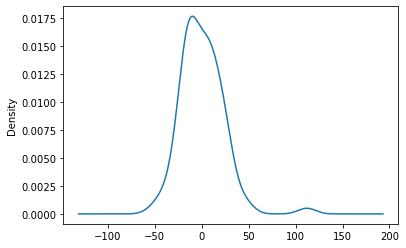

In [102]:
model_ARIMA_fit.resid.plot(kind='kde')

In [103]:
test_data['Predicted_ARIMA']=pred

In [104]:
test_data.columns

Index(['Thousands of Passengers', 'Passengers First Difference',
       'Passengers Second Difference', 'Passengers 12 Difference',
       'Predicted_ARIMA'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

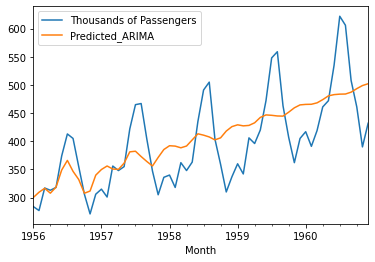

In [105]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

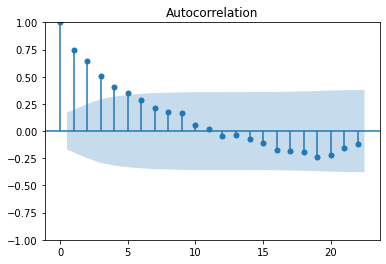

In [106]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())

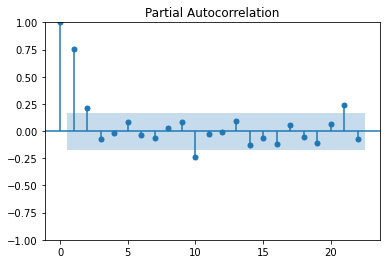

In [107]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [109]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [110]:
model_SARIMA_fit=model_SARIMA.fit()

In [111]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 20 Jan 2023   AIC                            548.481
Time:                                     23:54:19   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [113]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

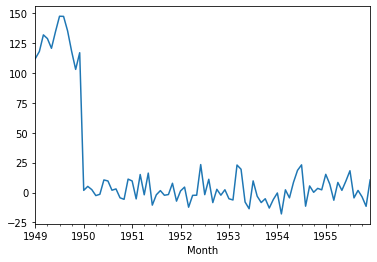

In [114]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

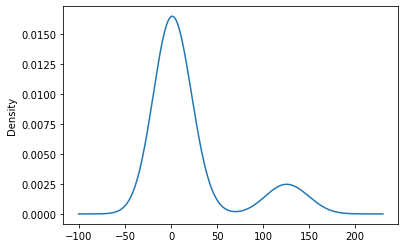

In [115]:
model_SARIMA_fit.resid.plot(kind='kde')

In [116]:
test_data['Predicted_SARIMA']=pred_Sarima

In [117]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443014,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544231,NaN


In [118]:
test_data.columns

Index(['Thousands of Passengers', 'Passengers First Difference',
       'Passengers Second Difference', 'Passengers 12 Difference',
       'Predicted_ARIMA', 'Predicted_SARIMA'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

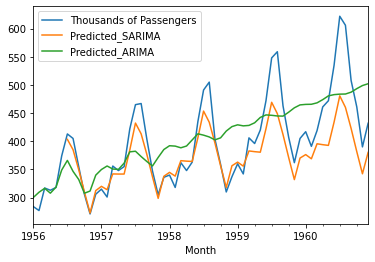

In [120]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()